In [1]:
# Loading Libraries
import pandas as pd #Data Manipulation

import matplotlib.pyplot as plt #Plotting
import seaborn as sns #Plotting

from sklearn.model_selection import train_test_split #Train/Test Split
from sklearn.linear_model import LogisticRegression #Model

from sklearn.metrics import classification_report #Metrics
from sklearn.metrics import accuracy_score #Metrics

In [2]:
# Reading Dataset from repository
data = pd.read_csv('data.csv')

In [ ]:
DATA UNDERSTANDING

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
DATA CLEANING

In [7]:
# check for null values

data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Selecting relevant columns
breast_data = data.iloc[:,1:12]

In [11]:
# Removal of Duplicate Rows
breast_data.drop_duplicates(inplace=True)

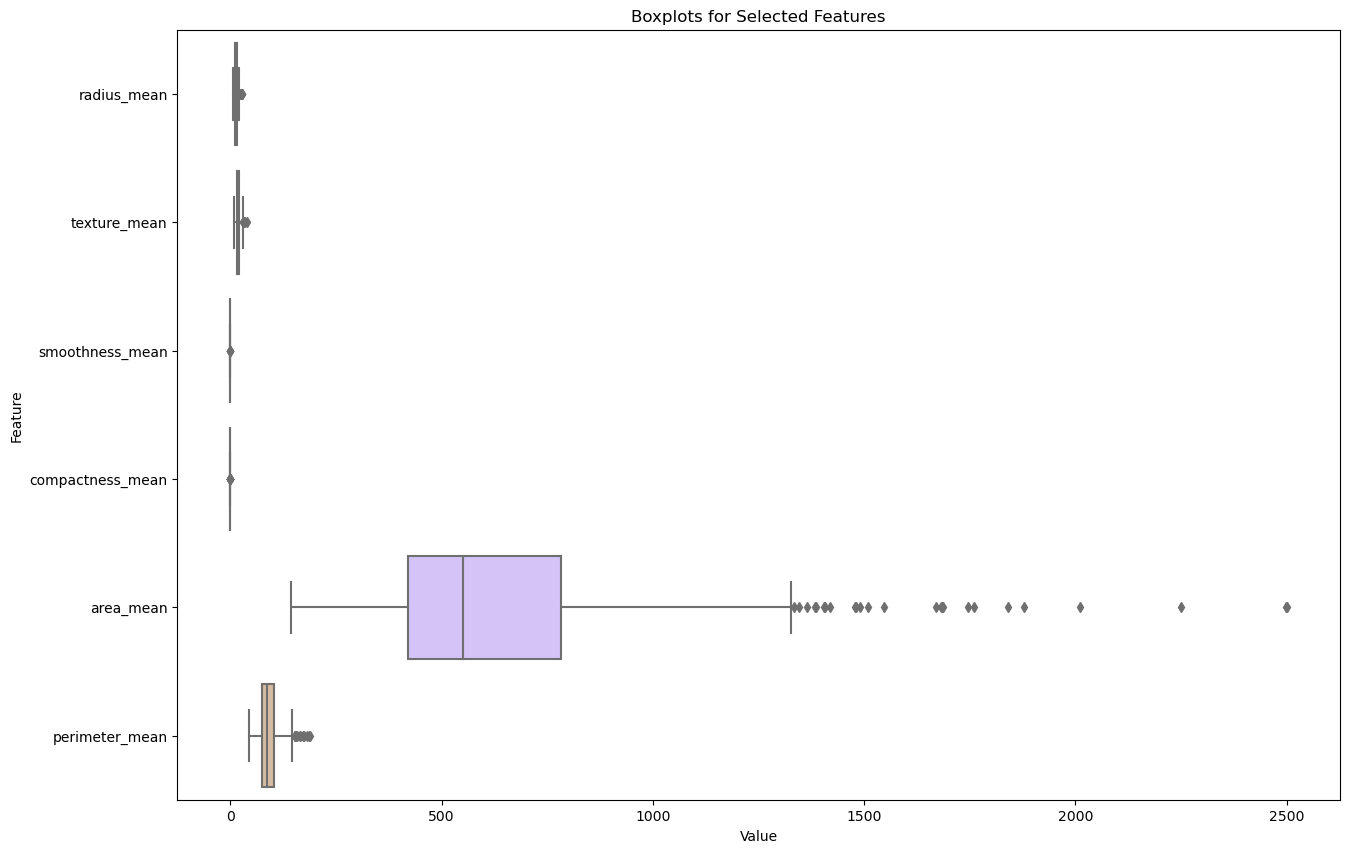

In [12]:
# Checking outliers using Boxplot

# Define the selected features again
selected_features = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'area_mean', 'perimeter_mean']

# Plotting boxplots for the selected features
plt.figure(figsize=(15, 10))
sns.boxplot(data=breast_data[selected_features], palette="pastel", orient="h")
plt.title('Boxplots for Selected Features')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

In [13]:
df = breast_data

In [ ]:
DATA VISUALISATION 

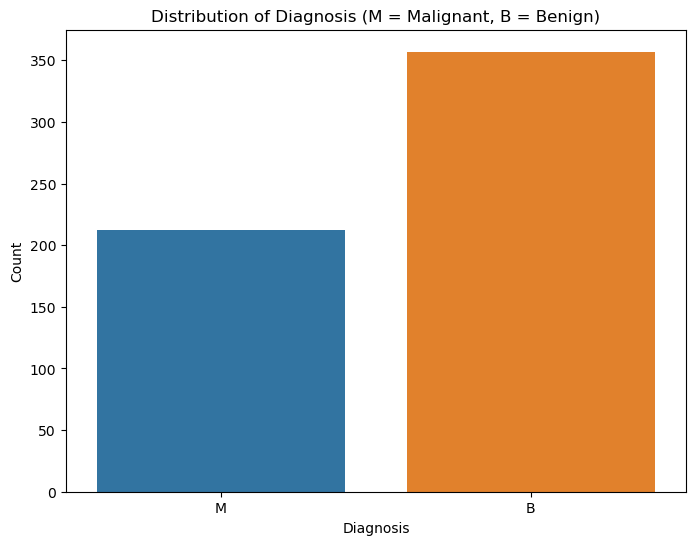

In [14]:
# 1. Distribution of the diagnosis target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis (M = Malignant, B = Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

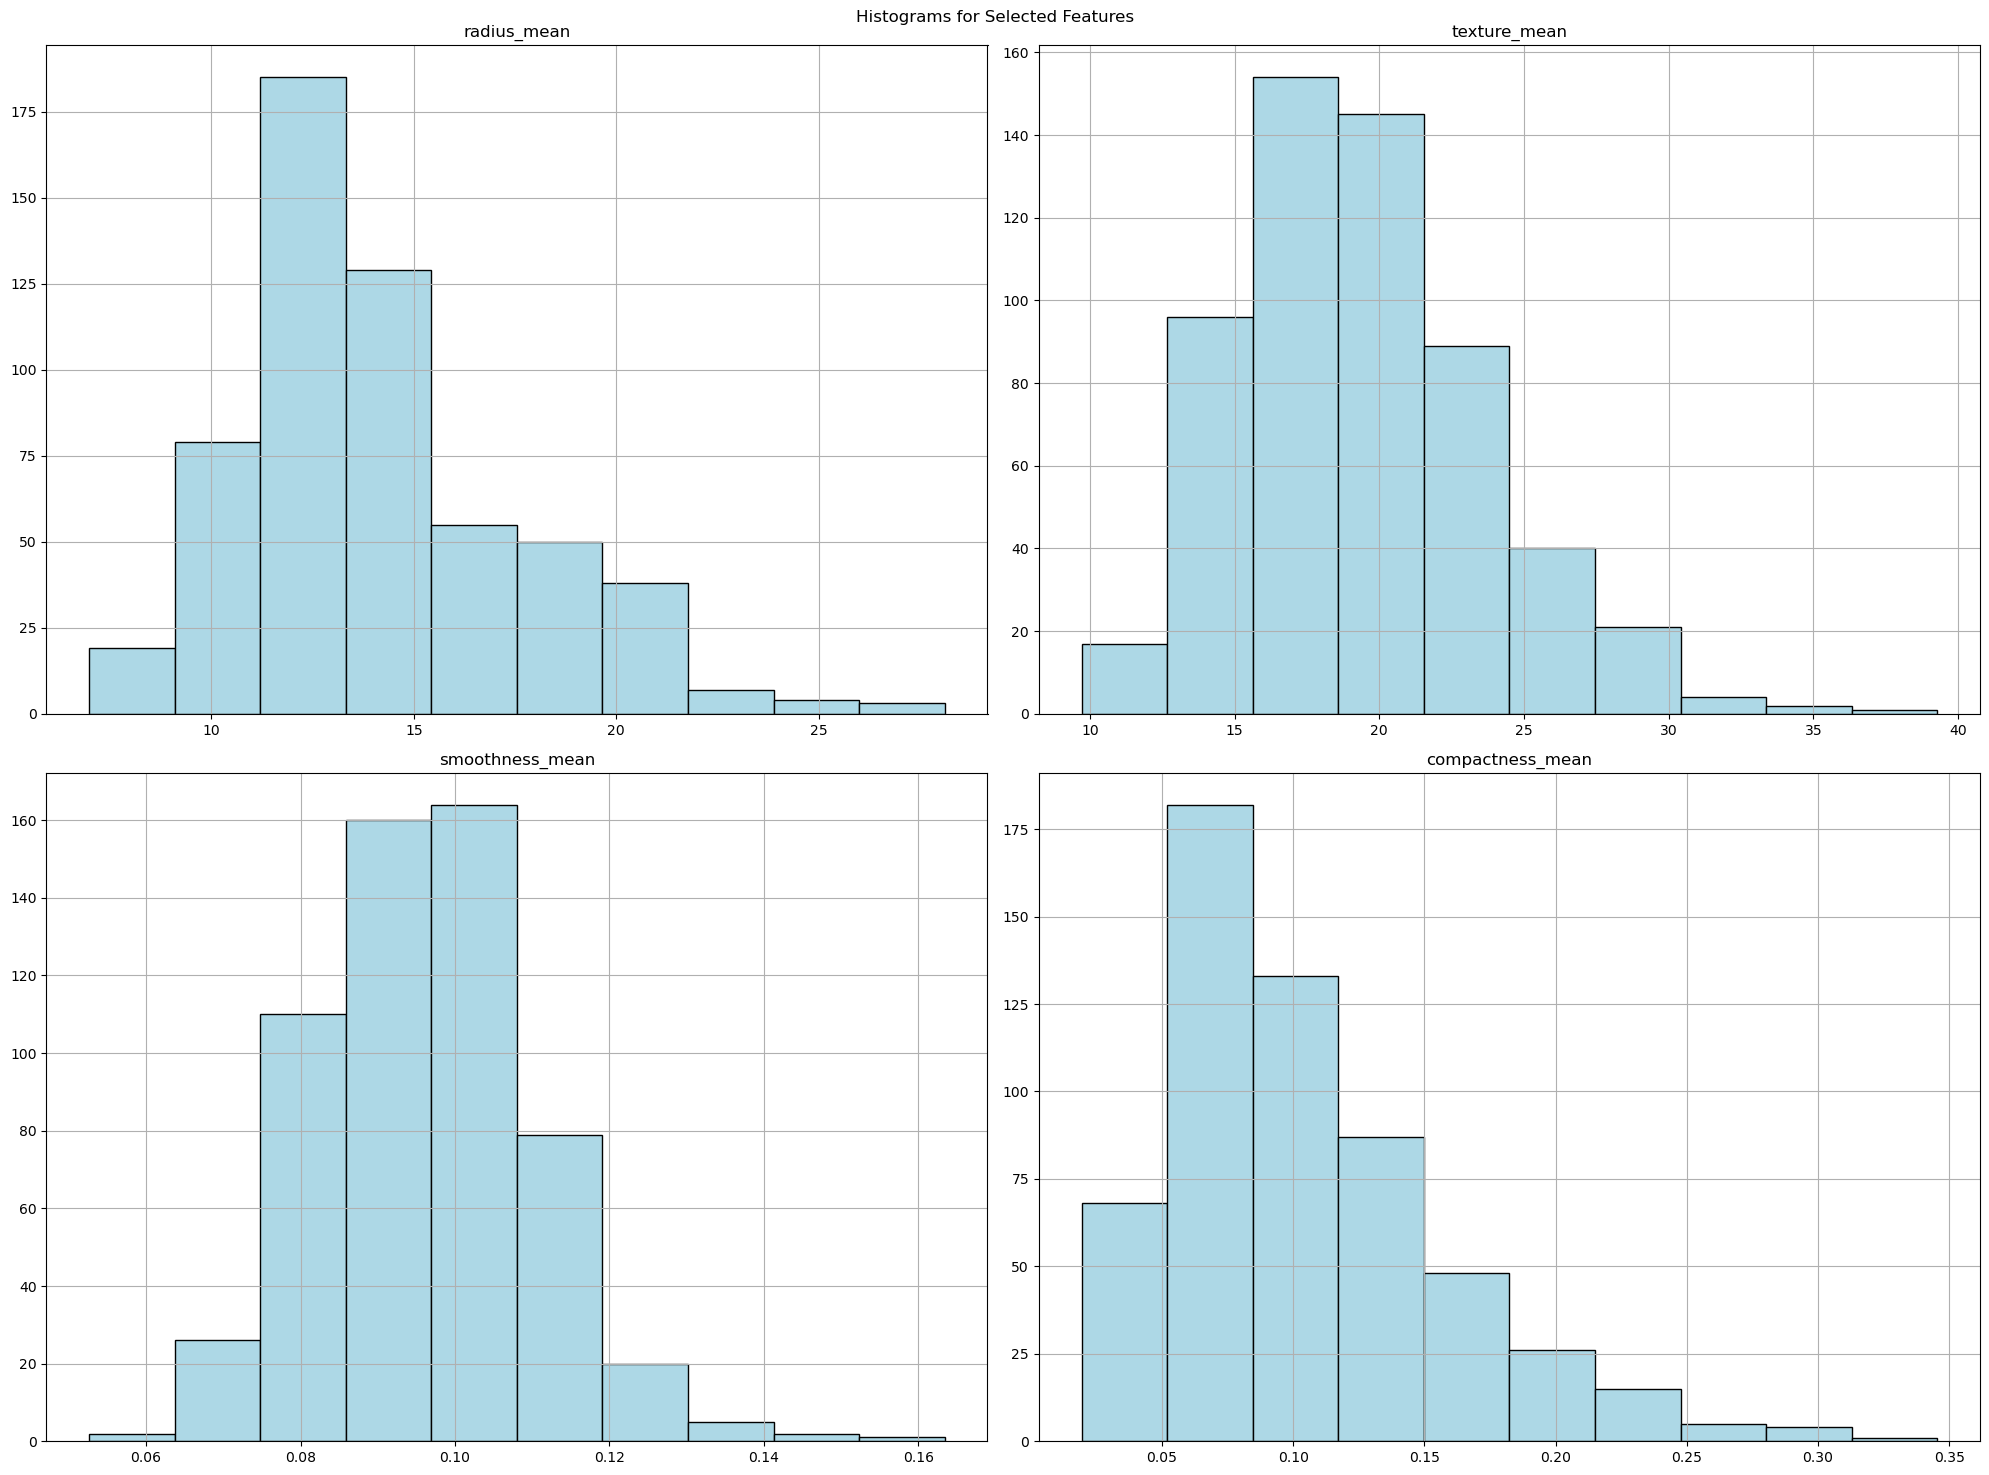

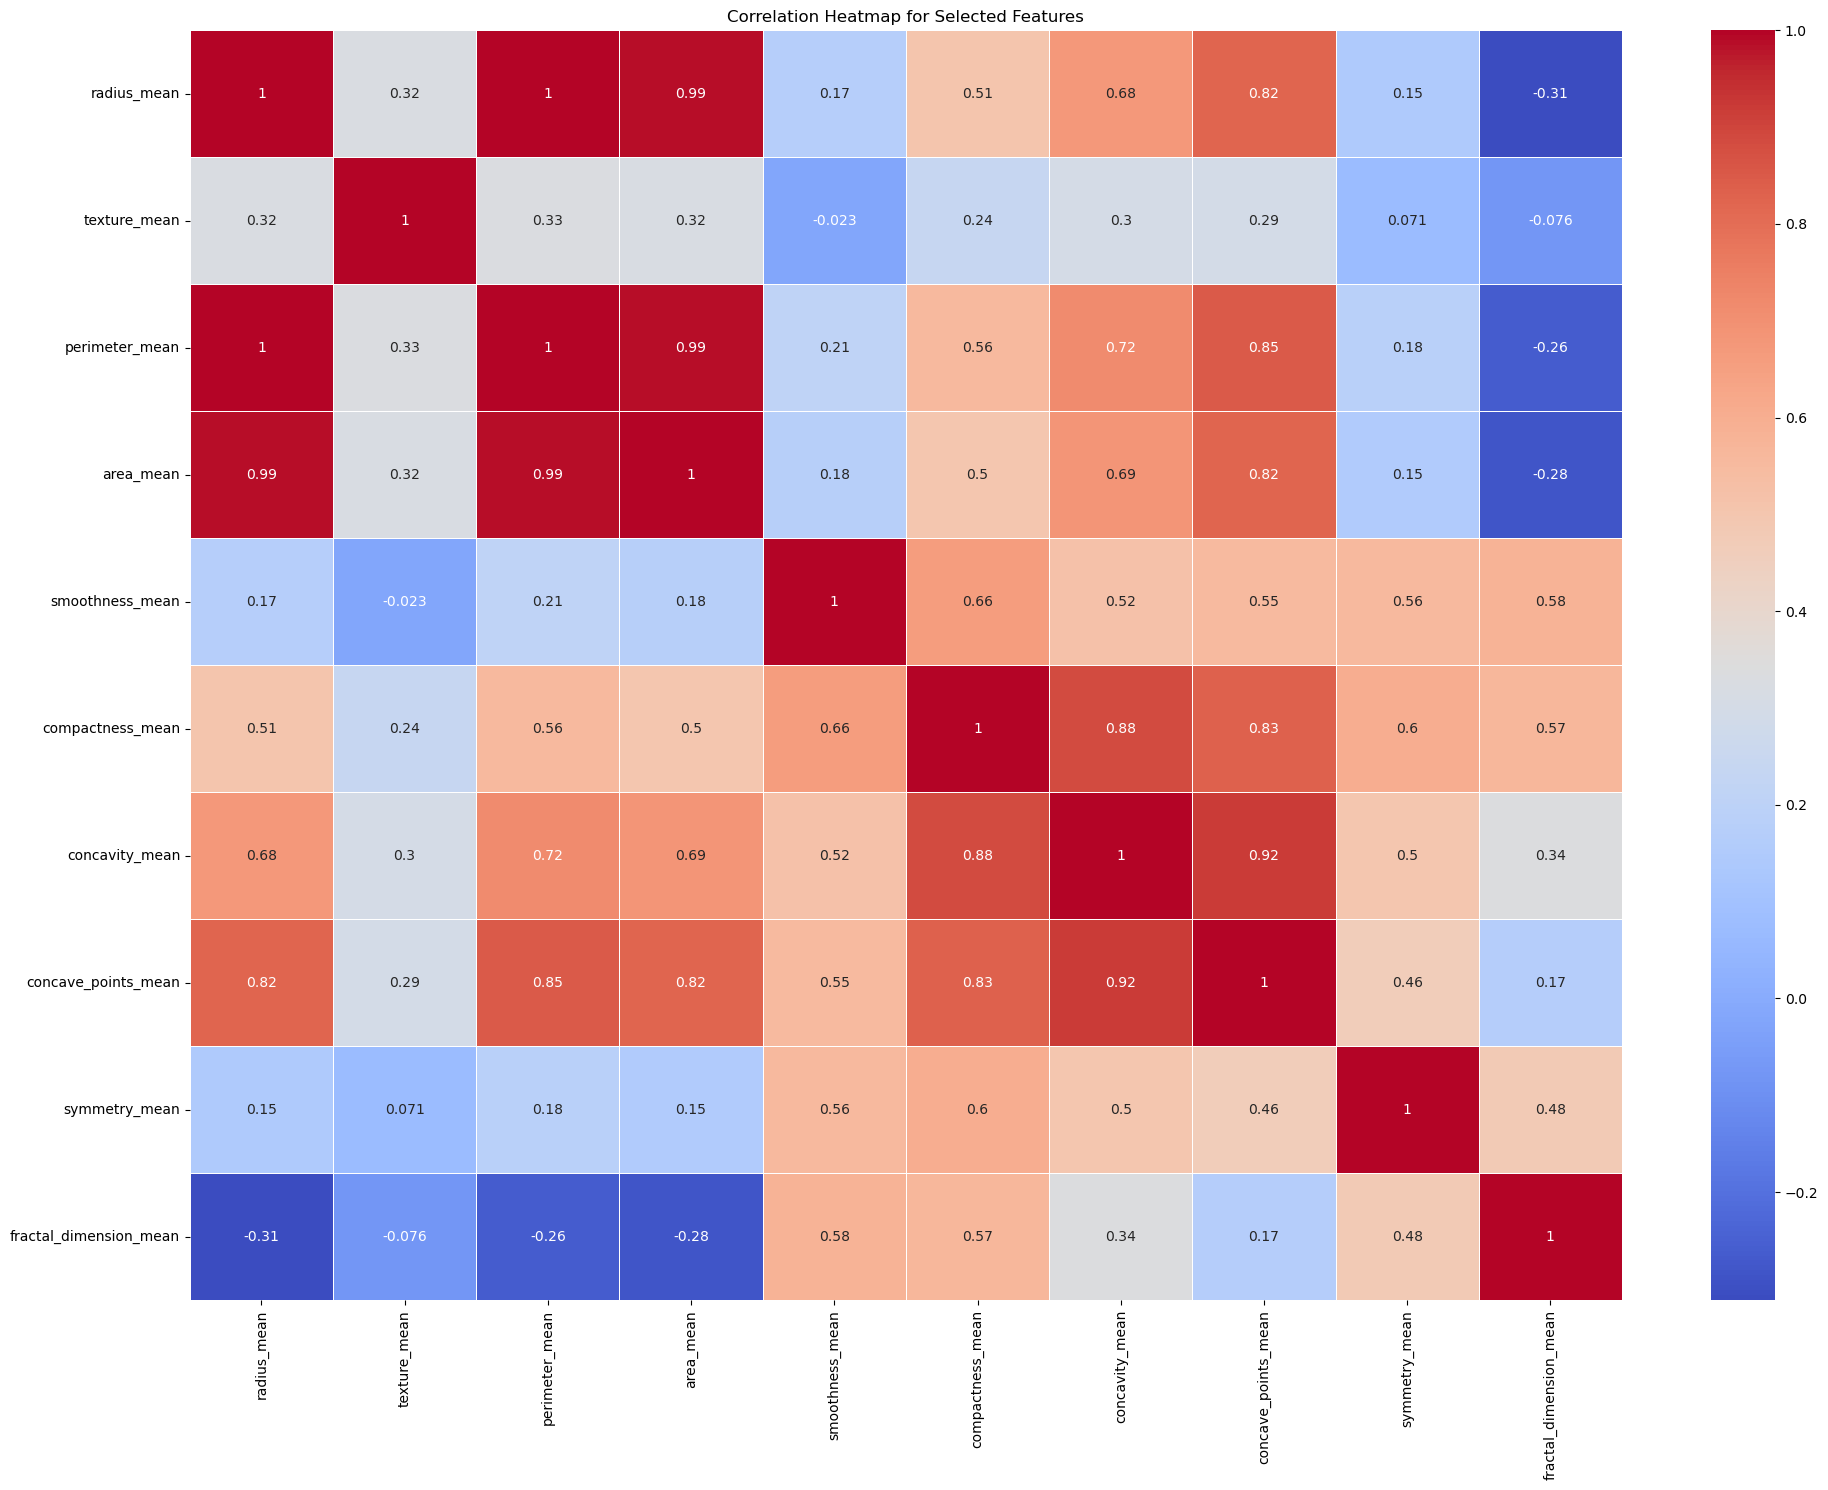

In [15]:
# 2. Histograms for a selection of features
features = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean']
plt.figure(figsize=(20, 15))
df[features].hist(ax=plt.gca(), color='lightblue', edgecolor='black')
plt.suptitle('Histograms for Selected Features')
plt.tight_layout()
plt.show()

# 3. Correlation heatmap to understand relationships between features
correlation_matrix = df.corr()  
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Selected Features')
plt.tight_layout()
plt.show()

In [ ]:
DATA PREPROCESSING FOR MACHINE LEARNING

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Convert the 'diagnosis' column to binary labels
le = LabelEncoder()
breast_data['diagnosis'] = le.fit_transform(breast_data['diagnosis'])

# Splitting the data into features and target variable
X = breast_data.drop(columns=['diagnosis'])
y = breast_data['diagnosis']

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split the data into training and testing sets
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

X_scaled_train.shape, X_scaled_test.shape, y_train.shape, y_test.shape

((426, 10), (143, 10), (426,), (143,))

In [ ]:
MODEL BUILDING

In [17]:
from sklearn.svm import SVC

In [18]:
# Defining the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
}

# Training the models and evaluating their performance
model_accuracies = {}

for name, model in models.items():
    # Train the model
    model.fit(X_scaled_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_scaled_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

# Sorting the models based on accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)

sorted_models

[('Support Vector Machine', 0.972027972027972),
 ('Logistic Regression', 0.9440559440559441)]

In [19]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        91
           1       0.94      0.98      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



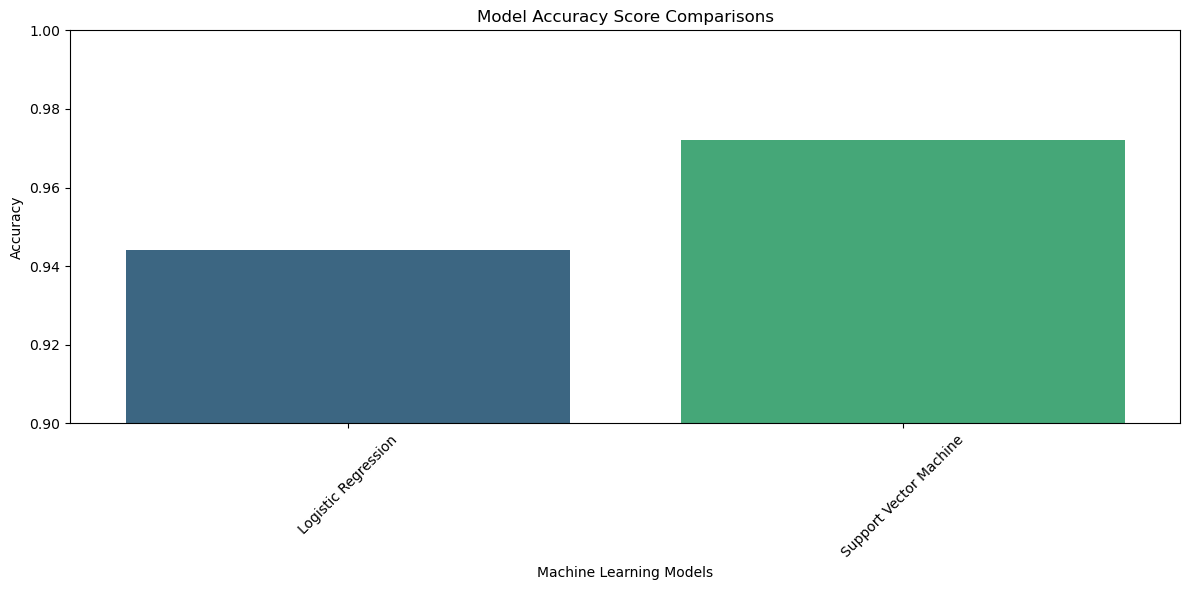

In [20]:
# Creating a bar plot of the model accuracy scores

plt.figure(figsize=(12, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylim(0.9, 1.0)
plt.title('Model Accuracy Score Comparisons')
plt.ylabel('Accuracy')
plt.xlabel('Machine Learning Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()